# Forex Rate Prediction - USD/JPY

This example is to predict the daily sign change of foreign exchange price with Japan.

The data source is from Yahoo Finance.

The data availability is from 30th October 1996 to 31st January 2022.

There are seven columns in the csv files, they are "Date", "Open", "High", "Low", "Close", "Adj Close", "Volume".

## 1. Data Acquisition

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [4]:
# Reading dataset
forex_dataset = pd.read_csv('Data/Historical forex rate/JPY=X.csv')
forex_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/10/1996,114.370003,114.480003,113.610001,114.180000,114.180000,0.0
1,31/10/1996,NaN,NaN,NaN,NaN,NaN,NaN
2,1/11/1996,113.500000,113.500000,113.500000,113.500000,113.500000,0.0
3,4/11/1996,113.279999,113.980003,112.949997,113.879997,113.879997,0.0
4,5/11/1996,113.709999,114.330002,113.449997,114.250000,114.250000,0.0


In [5]:
forex_dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6588,31/1/2022,115.577003,115.176002,115.238998,115.262001,115.262001,0.0
6589,1/2/2022,115.192001,114.568001,115.143997,115.121002,115.121002,0.0
6590,2/2/2022,114.795998,114.193001,114.724999,114.736000,114.736000,0.0
6591,3/2/2022,114.969002,114.325996,114.367996,114.382004,114.382004,0.0
6592,4/2/2022,115.426002,114.780998,114.969002,114.957001,114.957001,0.0


## 2. Exploratory Data Analysis

In [6]:
forex_dataset.shape

(6593, 7)

In [7]:
# Checking null values
forex_dataset.isnull().sum()

Date          0
Open         43
High         43
Low          43
Close        43
Adj Close    43
Volume       43
dtype: int64

In [8]:
# Fill NaN values using an interpolation method ("linear")
forex_dataset.interpolate(inplace = True)

In [9]:
# See if there is any difference between the values in "Close" and "Adj Close"
all(forex_dataset['Close']==forex_dataset['Adj Close']) and all(forex_dataset['Volume']<=0)

True

In [10]:
# Drop out the "Adj Close" for redundancy
forex_dataset.drop(['Adj Close','Volume'], axis = 1, inplace = True)

In [11]:
# Resort the date
forex_dataset['Date'] = pd.to_datetime(forex_dataset['Date'], format = '%d/%m/%Y')
forex_dataset.head()

,Date,Open,High,Low,Close
0,1996-10-30,114.370003,114.480003,113.610001,114.180000
1,1996-10-31,113.935001,113.990002,113.555001,113.840000
2,1996-11-01,113.500000,113.500000,113.500000,113.500000
3,1996-11-04,113.279999,113.980003,112.949997,113.879997
4,1996-11-05,113.709999,114.330002,113.449997,114.250000


In [12]:
# See if duplicated row exists
forex_dataset.duplicated().sum()

0

In [13]:
# Set the date to be the index
Date = forex_dataset['Date']
forex_dataset.set_index('Date', inplace= True) 

In [14]:
# Show a summary of the data
forex_dataset.describe()

,Open,High,Low,Close
count,6593.000000,6593.000000,6593.000000,6593.000000
mean,108.617092,109.059958,108.128047,108.612217
std,13.216975,13.297836,13.128967,13.215523
min,75.750000,75.973999,75.570000,75.739998
25%,103.239998,103.709999,102.750000,103.231003
50%,109.817001,110.180000,109.419998,109.830002
75%,117.779999,118.269997,117.279999,117.779999
max,147.339996,147.630005,146.000000,147.220001


Text(0.5, 1.0, 'JPY Exchange Rate at All Time')

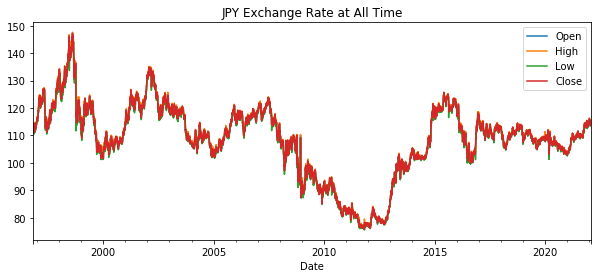

In [15]:
# Plot the Janpanese yen exchange rate
forex_dataset[['Open','High','Low','Close']].plot(figsize = (10,4))
plt.title('JPY Exchange Rate at All Time')

Text(0.5, 0, 'JPY Exchange Rate')

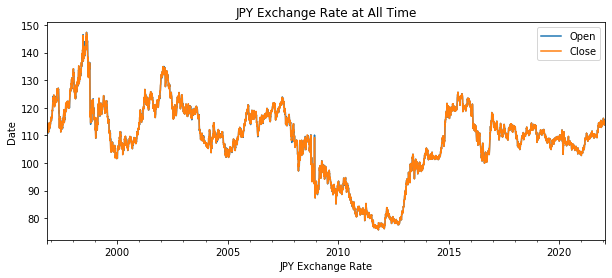

In [16]:
forex_dataset[['Open','Close']].plot(figsize = (10,4))
plt.title('JPY Exchange Rate at All Time')
plt.ylabel('Date')
plt.xlabel('JPY Exchange Rate')

In [17]:
# Show the correlation of the features
pd.DataFrame(forex_dataset.corr())

,Open,High,Low,Close
Open,1.000000,0.999395,0.999097,0.999018
High,0.999395,1.000000,0.998879,0.999343
Low,0.999097,0.998879,1.000000,0.999382
Close,0.999018,0.999343,0.999382,1.000000


In [18]:
# Calculate the daily return each day
forex_dataset['Daily Return'] = forex_dataset['Close'].pct_change()
forex_dataset.head(3)

,Open,High,Low,Close,Daily Return
Date,,,,,
1996-10-30,114.370003,114.480003,113.610001,114.18,NaN
1996-10-31,113.935001,113.990002,113.555001,113.84,-0.002978
1996-11-01,113.500000,113.500000,113.500000,113.50,-0.002987


In [19]:
forex_dataset = forex_dataset.dropna() # .dropna() because some function like seaborn cannot read NaN values

In [20]:
forex_dataset.head(3)

,Open,High,Low,Close,Daily Return
Date,,,,,
1996-10-31,113.935001,113.990002,113.555001,113.840000,-0.002978
1996-11-01,113.500000,113.500000,113.500000,113.500000,-0.002987
1996-11-04,113.279999,113.980003,112.949997,113.879997,0.003348


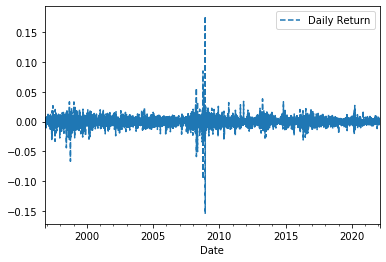

In [21]:
# Show th daily perentage change for 'Close' every day
fig = plt.plot()
forex_dataset['Daily Return'].plot(legend = True, linestyle = '--')

Text(0.5, 6.79999999999999, 'Daily Return')

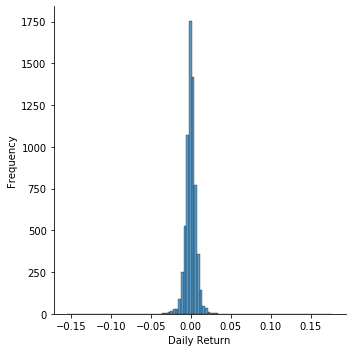

In [23]:
# Show the distribution of the daily return data, as well as the distribution curve (but too small in this plot)
import seaborn as sns
sns.displot(forex_dataset['Daily Return'], bins=100) 
plt.ylabel('Frequency')
plt.xlabel('Daily Return')

In [24]:
# Check if the data follows the normal distribution
from scipy.stats import shapiro
from scipy.stats import normaltest

daily_return = forex_dataset['Daily Return'].dropna()
print(normaltest(daily_return))
print(shapiro(daily_return))

# The first output is the test statistic, the second is the p-value
# If the p-Value is larger than 0.05, a normal distribution is assumed
## The Shapiro Wilk test is better for data size < 5000

NormaltestResult(statistic=2680.325968054895, pvalue=0.0)
(0.8134036660194397, 0.0)


C:\Users\user\Python\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
# Check if the data follows the normal distribution after removing outliers
daily_return2 = forex_dataset['Daily Return'][forex_dataset['Daily Return']>-0.05][forex_dataset['Daily Return']<0.05]
print(normaltest(daily_return2))
print(shapiro(daily_return2))

NormaltestResult(statistic=558.9712163701215, pvalue=4.1777514041899343e-122)
(0.9646073579788208, 2.345027241665706e-37)


In [26]:
# Split the dataset into X and y, with looking back n days of data
# Features of the previous date and the 'Open' of next day are used to predict the closing value of the next day
def get_data(data, look_back, features, target, include_current_open=False): 
    X_data, y_data = [], []
    current_open = []
    for i in range(len(data)-look_back):
        X_data.append(data.iloc[i:(i+look_back),features].values.reshape(1,-1).tolist()[0]) 
        y_data.append(data.iloc[i+look_back, target])
        
        # Add a feature for the current 'Open' price for a mulitple feature prediction
        if include_current_open==True:
            current_open.append(data.iloc[i+look_back,0])
            
    if include_current_open==True:
        X_data = [np.append(X, X_open) for X, X_open in zip(X_data, current_open)]
        return np.array(X_data), np.array(y_data).reshape(-1,1)
    elif len(features) == 1:
        return np.array(X_data), np.array(y_data).reshape(-1,1)
    else:
        return np.array(X_data), np.array(y_data).reshape(-1,1)

In [28]:
from datetime import timedelta
from datetime import datetime

# Convert the string type of date into a datetime object, and find the start date for tesing
train_frac = 0.7
test_frac = 0.2
val_frac = 0.1
rows = len(forex_dataset)

train_dataset = forex_dataset.iloc[0:int(train_frac*rows)].copy()
train_dataset.tail()

,Open,High,Low,Close,Daily Return
Date,,,,,
2014-07-02,101.550003,101.779999,101.389999,101.540001,0.002468
2014-07-03,101.829002,102.258003,101.769997,101.830002,0.002856
2014-07-04,102.196999,102.212997,101.970001,102.180000,0.003437
2014-07-07,102.107002,102.192001,101.819000,102.110001,-0.000685
2014-07-08,101.809998,101.849998,101.480003,101.800003,-0.003036


In [30]:
test_dataset = forex_dataset.iloc[int(train_frac*rows): int((train_frac+test_frac)*rows)].copy()
val_dataset = forex_dataset.iloc[int((train_frac+test_frac)*rows):].copy()

date1 = train_dataset.index[-1].date()
if date1.weekday() == 5:
    testing_start_date = str(date1 + timedelta(days = 3))
else:
    testing_start_date = str(date1 + timedelta(days = 1))

forex_dataset['Date'] = forex_dataset.index
Dates = np.array(forex_dataset[testing_start_date:][['Date']]).reshape(-1,1)
forex_dataset.drop('Date', axis = 1, inplace = True)

In [31]:
# # Retrieve the training and testing datasets from forex_dataset
# train_dataset = forex_dataset[:testing_start_date] 
# test_dataset = forex_dataset[testing_start_date:] # so predict for values starting on testing_start_date

In [32]:
# use the function get_data
X_train, y_train = get_data(train_dataset, look_back = 1, features=[3], target = [3], include_current_open=False)
X_val, y_val = get_data(val_dataset, look_back = 1, features=[3], target = [3], include_current_open=False)
X_test, y_test = get_data(test_dataset, look_back = 1, features=[3], target = [3], include_current_open=False)

In [33]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((4613, 1), (4613, 1), (659, 1), (659, 1), (1317, 1), (1317, 1))

In [34]:
X_train[:3]

array([[113.84    ],
       [113.5     ],
       [113.879997]])

In [35]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_X.fit_transform(np.append(X_train,X_val, axis = 0))
X_train = scaler_X.transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
scaler_y.fit_transform(np.append(y_train,y_val, axis=0))
y_train = scaler_y.transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

# Reshape the 2D-array into 3D-array
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1);
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
y_train = y_train.reshape(-1,1,1)
y_test = y_test.reshape(-1,1,1);
y_val = y_val.reshape(-1,1,1)

In [36]:
# Print the shapes of the training and testing datasets
X_train.shape, X_test.shape, X_val.shape, y_val.shape, y_train.shape, y_test.shape 

((4613, 1, 1),
 (1317, 1, 1),
 (659, 1, 1),
 (659, 1, 1),
 (4613, 1, 1),
 (1317, 1, 1))

In [37]:
X_train[:3]

array([[[0.53301623]],

       [[0.52825966]],

       [[0.53357579]]])

In [38]:
# Plot the correlation map in another method (if there are mulitple features)
pd.DataFrame(X_train.reshape(-1,X_train.shape[1])).corr().style.background_gradient(cmap='coolwarm').set_precision(4)

,0
0,1


## 3. Building the Model

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import callbacks
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences = False, input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compiling
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'mse')

In [41]:
# Training the model
early_stopping = callbacks.EarlyStopping(patience= 5, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val), batch_size = 32, callbacks=[early_stopping])

Epoch 1/30
145/145 [==============================] - 4s 9ms/step - loss: 0.2147 - val_loss: 0.1645
Epoch 2/30
145/145 [==============================] - 1s 6ms/step - loss: 0.1759 - val_loss: 0.1294
Epoch 3/30
145/145 [==============================] - 1s 6ms/step - loss: 0.1405 - val_loss: 0.0969
Epoch 4/30
145/145 [==============================] - 1s 6ms/step - loss: 0.1073 - val_loss: 0.0670
Epoch 5/30
145/145 [==============================] - 1s 6ms/step - loss: 0.0776 - val_loss: 0.0417
Epoch 6/30
145/145 [==============================] - 1s 6ms/step - loss: 0.0534 - val_loss: 0.0226
Epoch 7/30
145/145 [==============================] - 1s 6ms/step - loss: 0.0359 - val_loss: 0.0104
Epoch 8/30
145/145 [==============================] - 1s 6ms/step - loss: 0.0251 - val_loss: 0.0040
Epoch 9/30
145/145 [==============================] - 1s 6ms/step - loss: 0.0194 - val_loss: 0.0014
Epoch 10/30
145/145 [==============================] - 1s 6ms/step - loss: 0.0168 - val_loss: 6.9425

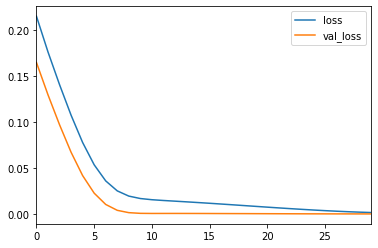

In [42]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [43]:
# The standard deviations
scaler_X.scale_

array([0.01398993])

In [44]:
# Print the shapes of the training and testing datasets
X_train.shape, X_test.shape, X_val.shape, y_val.shape, y_train.shape, y_test.shape 

((4613, 1, 1),
 (1317, 1, 1),
 (659, 1, 1),
 (659, 1, 1),
 (4613, 1, 1),
 (1317, 1, 1))

## 4. Model Prediction

In [45]:
# Prediction using the trained model
y_train_pred = model.predict(X_train)
y_train_pred = scaler_y.inverse_transform(y_train_pred)

y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
# Process the features shape
y_train = y_train.reshape(-1,1)
y_train = scaler_y.inverse_transform(y_train)

y_test = y_test.reshape(-1,1)
y_test = scaler_y.inverse_transform(y_test)
pd.DataFrame(
  {'pred': y_pred.tolist(),
   'test': y_test.tolist()
}).head(5)

,pred,test
0,[102.3501205444336],[101.535004]
1,[102.41221618652344],[101.282997]
2,[102.2037124633789],[101.370003]
3,[102.2756576538086],[101.519997]
4,[102.39978790283203],[101.660004]


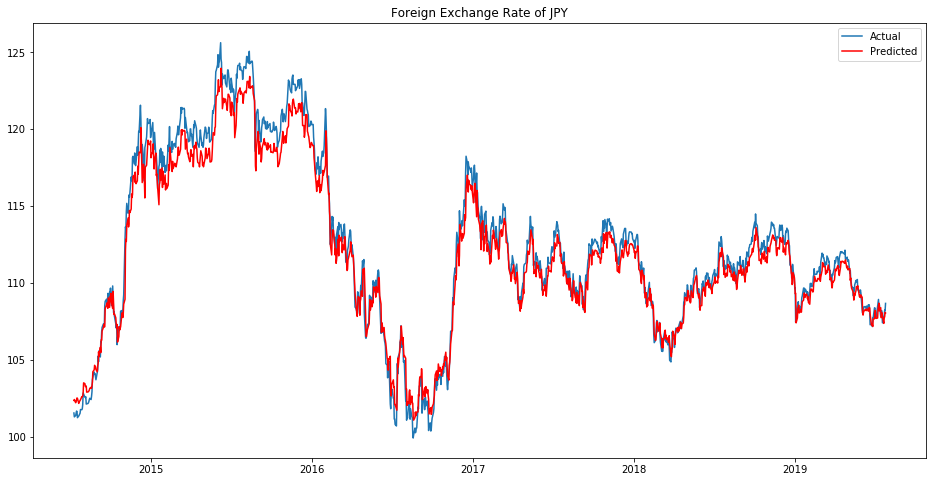

In [46]:
# Visualize the result
plt.figure(figsize=(16,8))
plt.title('Foreign Exchange Rate of JPY')
plt.plot(forex_dataset.index[int(train_frac*rows)+X_train.shape[1]: int((train_frac+test_frac)*rows)], y_test, label='Actual')
plt.plot(forex_dataset.index[int(train_frac*rows)+X_train.shape[1]: int((train_frac+test_frac)*rows)], y_pred, label='Predicted', color = 'r')
plt.legend()

## 5. Model Evaluation

In [47]:
# Evalute the root mean squared error result of the y_pred, and y_train_pred
pred_mse_result = np.sqrt(np.mean(abs(y_test-y_pred)**2))
train_pred_mse_result = np.sqrt(np.mean(abs(y_train_pred - y_train)**2))
print(f'The prediction mse result for testing dataset is {pred_mse_result:0.5f}, and that for training dataset is {train_pred_mse_result:0.5f}')

The prediction mse result for testing dataset is 1.03312, and that for training dataset is 2.66771


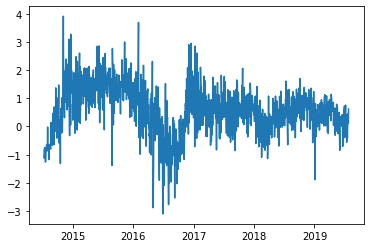

In [48]:
# Take a look at the deviation from the actual price
plt.plot(forex_dataset.index[int(train_frac*rows)+X_train.shape[1]: int((train_frac+test_frac)*rows)],y_test-y_pred)

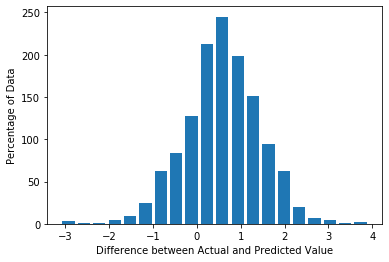

In [49]:
# Show the distribution of the deviation
plt.hist(y_test-y_pred, bins = 20, rwidth=0.8)
plt.ylabel('Percentage of Data')
plt.xlabel('Difference between Actual and Predicted Value');
plt.show()

In [50]:
X_train.shape

(4613, 1, 1)

In [51]:
# Record whether the prediction and testing data has an increase or decrease for each testing date
daily_y_pred_change = []
daily_y_test_change = []
daily_complying_sign = []
y_pred_list = y_pred.reshape(1,-1).tolist()[0]
y_test_list = y_test.reshape(1,-1).tolist()[0]
for i, pred in enumerate(y_pred_list):
    if i != len(y_pred_list)-X_train.shape[1]:
        daily_y_pred_change.append(y_pred_list[i+1] - y_pred_list[i])
        daily_y_test_change.append(y_test_list[i+1] - y_test_list[i])

        if (daily_y_pred_change[i] >= 0 and daily_y_test_change[i] >=0) or (daily_y_pred_change[i] < 0 and daily_y_test_change[i] < 0):
            daily_complying_sign.append(1)
        else:
            daily_complying_sign.append(0)

In [52]:
daily_y_pred_change, daily_y_test_change, daily_complying_sign = sign_prediction(y_pred, y_test, look_back = X_train.shape[1])
# 1 denotes as predicted corrected for the change of sign, while 0 means the opposite
daily_complying_sign.count(1)/len(daily_complying_sign)

0.46656534954407297

# Tuning the LSTM model

### Notes: 
1. Dropout on stacked LSTMs yields poor performance, as it introduces too much noise for stable time-dependency feature extraction. Fix: use recurrent_dropout, meanwhile, use activation='tanh' instead of 'relu' which is unstable
2. If working with signal data, or otherwise data with (1) outliers; (2) phase information; (3) frequency information - MinMaxScaler will corrupt the latter two plus amplitude information per (1). Fix: use StandardScaler, or QuantileTransformer


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from datetime import timedelta
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import callbacks
import time

In [49]:
# Function to split the dataset into X and y, with looking back n days of data and selected features
# Features of the previous date and the 'Open' of next day are used to predict the closing value of the next day
def get_data(data, look_back, features, target, include_current_open=False): 
    X_data, y_data = [], []
    current_open = []
    for i in range(len(data)-look_back):
        X_data.append(data.iloc[i:(i+look_back),features].values.tolist()[0]) 
        y_data.append(data.iloc[i+look_back, target])
        
        # Add a feature for the current 'Open' price for a mulitple feature prediction
        if include_current_open==True:
            current_open.append(data.iloc[i+look_back,0])
            
    if include_current_open==True:
        X_data = [np.append(X, X_open) for X, X_open in zip(X_data, current_open)]
        return np.array(X_data), np.array(y_data).reshape(-1,1)
    elif len(features) == 1:
        return np.array(X_data).reshape(-1,1), np.array(y_data).reshape(-1,1)
    else:
        return np.array(X_data), np.array(y_data).reshape(-1,1)

# Function to split the training and testing datasets from the X and y datasets, with normalization
def spliting_dataset(forex_dataset, training_end_date, look_back, features, target, include_current_open, normalization):
    
    # Convert the string type of date into a datetime object, and find the start date for tesing
    date1 = datetime.strptime(training_end_date, '%Y-%m-%d').date()
    if date1.weekday() == 5:
        testing_start_date = str(date1 + timedelta(days = 3))
    else:
        testing_start_date = str(date1 + timedelta(days = 1))
    
    # Retrieve the training and testing datasets from forex_dataset
    train_frac = 0.7
    test_frac = 0.2
    val_frac = 0.1
    rows = len(forex_dataset)
    
    forex_dataset['Date'] = forex_dataset.index
    Dates = forex_dataset.iloc[int(train_frac*rows): int((train_frac+test_frac)*rows)][['Date']]
    forex_dataset.drop('Date', axis = 1, inplace = True)
    
    train_dataset = forex_dataset.iloc[0:int(train_frac*rows)].copy()
    test_dataset = forex_dataset.iloc[int(train_frac*rows): int((train_frac+test_frac)*rows)].copy()
    val_dataset = forex_dataset.iloc[int((train_frac+test_frac)*rows):].copy()

    date1 = train_dataset.index[-1].date() # so as to predict the values starting from the testing_start_date
    
    # use the function get_data
    X_train, y_train = get_data(train_dataset, look_back = look_back, features=features, target = target, include_current_open=include_current_open)
    X_test, y_test = get_data(test_dataset, look_back = look_back, features=features, target = target, include_current_open=include_current_open)
    X_val, y_val = get_data(val_dataset, look_back = look_back, features=features, target = target, include_current_open=include_current_open)
    
    # Normalization
    scaler_X = normalization
    scaler_X.fit_transform(np.append(X_train,X_val, axis = 0))
    X_train = scaler_X.transform(X_train)
    X_val = scaler_X.transform(X_val)
    X_test = scaler_X.transform(X_test)

    scaler_y = normalization
    scaler_y.fit_transform(np.append(y_train,y_val, axis=0))
    y_train = scaler_y.transform(y_train)
    y_val = scaler_y.transform(y_val)
    y_test = scaler_y.transform(y_test)

    # Reshape the 2D-array into 3D-array
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    y_train = y_train.reshape(-1,1,1)
    y_test = y_test.reshape(-1,1,1)
    y_val = y_val.reshape(-1,1,1)
    
    return (X_train, X_test, X_val, y_train, y_test, y_val), np.array(Dates).reshape(-1,1), (scaler_X, scaler_y)

# Function to easily tune the achitecture for the LSTM model
def model_architecture(data, no_of_LSTM_layers, no_of_Dense_layers, no_of_nodes, activation, n_dropout, opt, loss, epochs, batch_size):    
    model = Sequential()
    for i in range(no_of_LSTM_layers):
        if i < no_of_LSTM_layers-1 and no_of_LSTM_layers >= 2:
            model.add(LSTM(no_of_nodes[0][i], activation = activation, return_sequences = True, input_shape=(data[0].shape[1],1), recurrent_dropout=n_dropout))
        elif no_of_LSTM_layers == 1:
            model.add(LSTM(no_of_nodes[0][i], activation = activation, return_sequences = False, input_shape=(data[0].shape[1],1), recurrent_dropout=n_dropout))
        else:
            model.add(LSTM(no_of_nodes[0][i], activation = activation, return_sequences = False, recurrent_dropout=n_dropout))
            
    for i in range(no_of_Dense_layers):
        if i < no_of_Dense_layers-1 and no_of_Dense_layers >= 2:
            model.add(Dense(no_of_nodes[1][i], activation = activation))
            model.add(Dropout(n_dropout))
        else:
            model.add(Dense(no_of_nodes[1][i]))
    
    # model.summary()
    model.compile(optimizer = opt, loss = loss)
    early_stopping = callbacks.EarlyStopping(patience= 5, restore_best_weights = True)
    model.fit(data[0], data[3], epochs = epochs, validation_data = (data[2], data[5]), batch_size = batch_size, callbacks=[early_stopping])
    return model

# Function to record whether the prediction correctly predicts the price sign of change for each testing day
def sign_prediction(y_test, y_pred, look_back, profit_threshold):
    daily_y_pred_change = []
    daily_y_test_change = []
    daily_complying_sign = []
    y_threshold_cnt = 0
    y_threshold_acc_cnt = 0
    y_pred_list = y_pred.reshape(1,-1).tolist()[0]; y_test_list = y_test.reshape(1,-1).tolist()[0]
    for i, pred in enumerate(y_pred_list):
        if i != len(y_pred_list)-look_back:
            daily_y_pred_change.append(y_pred_list[i+1] - y_pred_list[i])
            daily_y_test_change.append(y_test_list[i+1] - y_test_list[i])
            daily_y_pred_percentage_change = daily_y_pred_change[i]/y_pred_list[i]
            daily_y_test_percentage_change = daily_y_test_change[i]/y_test_list[i]
            
            if (daily_y_pred_change[i] >= 0 and daily_y_test_change[i] >=0) or (daily_y_pred_change[i] < 0 and daily_y_test_change[i] < 0):
                daily_complying_sign.append(1)
                if (abs(daily_y_pred_change[i]) >= profit_threshold and abs(daily_y_test_change[i]) >= profit_threshold):
                    y_threshold_acc_cnt = y_threshold_acc_cnt + 1
                    y_threshold_cnt = y_threshold_cnt + 1
                # Do not count the small profit which profit < profit_threshold
                elif (abs(daily_y_pred_change[i]) <= profit_threshold and abs(daily_y_test_change[i]) <= profit_threshold):
                    None
                else:
                    y_threshold_cnt = y_threshold_cnt + 1
            else:
                daily_complying_sign.append(0)
        else:
            break
    return daily_y_pred_change, daily_y_test_change, daily_complying_sign, y_threshold_acc_cnt/y_threshold_cnt

def plot_result(testing_days, y_test, y_pred, look_back):
    plt.figure(figsize=(16,8))
    plt.title('Foreign Exchange Rate of JPY')
    plt.plot(testing_days[look_back:], y_test, label='Actual')
    plt.plot(testing_days[look_back:], y_pred, label='Predicted', color = 'r')
    plt.legend()


In [53]:
def experiment(forex_dataset, testing_parameter):
    
    start_time = time.time()
    training_end_date = '2020-12-31'
    look_back = 1
    features = [3] # [0,1,2,3]
    target = [3]
    normalization = MinMaxScaler() # StandardScaler() or MinMaxScaler()
    include_current_open = False
    
    no_of_LSTM_layers = 1
    no_of_Dense_layers = 1
    no_of_nodes = [[128],[1]] # [[128,64],[32,1]]
    activation = 'relu'
    n_dropout = 0.1

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    loss = keras.losses.MeanSquaredError()
    epochs = 30
    batch_size = 32
    
    # count only the daily change > +or- 5%
    profit_threshold = 0.05
    
    n_repeat = 3

    mse_result = []
    sign_change_acc = []
    y_change_threshold_acc = []
    # prediction_n = []
    for [item] in testing_parameter:
        #############################################################################
        look_back = item
        #############################################################################
        (X_train, X_test, X_val, y_train, y_test, y_val), testing_days, (scaler_X, scaler_y) = spliting_dataset(forex_dataset, training_end_date, look_back, features, target, include_current_open, normalization)
        print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)
        
        data = [X_train, X_test, X_val, y_train, y_test, y_val]
        prediction = []
        for n in range(n_repeat):
            print(f'The current execution is {n+1}/{n_repeat}, with parameter = {item}')
            model = model_architecture(data, no_of_LSTM_layers, no_of_Dense_layers, no_of_nodes, activation, n_dropout, opt, loss, epochs, batch_size)
            y_pred = model.predict(X_test)
            y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1))
            prediction.append(y_pred.reshape(1,-1)[0].tolist())
            
        mean_prediction = np.mean(prediction, axis = 0).reshape(1,-1)[0]
#         std_prediction = np.std(prediction, axis = 0)

        y_test = scaler_y.inverse_transform(y_test.reshape(-1,1))
        y_test = y_test.reshape(1,-1)[0]
        mse_result.append(mean_squared_error(y_test, mean_prediction))

        daily_pred_change, daily_test_change, sign_change, threshold_acc = sign_prediction(y_test, mean_prediction, look_back, profit_threshold)    
        sign_change_acc.append(sign_change.count(1)/len(sign_change))
        y_change_threshold_acc.append(threshold_acc)
        # prediction_n.append(prediction)

    result = pd.DataFrame(
    {   'mse_result' : mse_result,
        'sign_change_accuracy' : sign_change_acc,
        'y_change_threshold_accurary' : y_change_threshold_acc,
         'testing_parameter' : testing_parameter
    }).set_index('testing_parameter')

    plot_result(testing_days, y_test, y_pred, look_back)
    
    end_time = time.time()
    elapse_time = end_time - start_time
    print(f'The elapsed time is {np.floor(elapse_time/60)} minutes and {elapse_time%60:0.0f} seconds.')
    return result # model, (X_train, X_test, y_train, y_test, y_pred), 

(4614, 1, 1) (4614, 1, 1) (1317, 1, 1) (1317, 1, 1) (659, 1, 1) (659, 1, 1)
The current execution is 1/3, with parameter = 1
Epoch 1/30
145/145 [==============================] - 7s 13ms/step - loss: 0.2102 - val_loss: 0.1579
Epoch 2/30
145/145 [==============================] - 1s 9ms/step - loss: 0.1657 - val_loss: 0.1172
Epoch 3/30
145/145 [==============================] - 1s 10ms/step - loss: 0.1241 - val_loss: 0.0792
Epoch 4/30
145/145 [==============================] - 1s 9ms/step - loss: 0.0862 - val_loss: 0.0469
Epoch 5/30
145/145 [==============================] - 1s 10ms/step - loss: 0.0558 - val_loss: 0.0232
Epoch 6/30
145/145 [==============================] - 1s 9ms/step - loss: 0.0347 - val_loss: 0.0092
Epoch 7/30
145/145 [==============================] - 1s 8ms/step - loss: 0.0230 - val_loss: 0.0029
Epoch 8/30
145/145 [==============================] - 1s 8ms/step - loss: 0.0176 - val_loss: 9.2162e-04
Epoch 9/30
145/145 [==============================] - 1s 8ms/step - 

145/145 [==============================] - 2s 12ms/step - loss: 6.0107e-04 - val_loss: 8.1753e-05
Epoch 24/30
145/145 [==============================] - 2s 12ms/step - loss: 4.8099e-04 - val_loss: 8.8619e-05
Epoch 25/30
145/145 [==============================] - 1s 10ms/step - loss: 4.0360e-04 - val_loss: 1.1207e-04
(4613, 1, 1) (4613, 1, 1) (1316, 1, 1) (1316, 1, 1) (658, 1, 1) (658, 1, 1)
The current execution is 1/3, with parameter = 2
Epoch 1/30
145/145 [==============================] - 7s 13ms/step - loss: 0.1309 - val_loss: 0.0454
Epoch 2/30
145/145 [==============================] - 1s 8ms/step - loss: 0.0409 - val_loss: 0.0067
Epoch 3/30
145/145 [==============================] - 1s 9ms/step - loss: 0.0186 - val_loss: 8.1582e-04
Epoch 4/30
145/145 [==============================] - 1s 9ms/step - loss: 0.0147 - val_loss: 5.8454e-04
Epoch 5/30
145/145 [==============================] - 1s 10ms/step - loss: 0.0133 - val_loss: 5.9465e-04
Epoch 6/30
145/145 [=======================

145/145 [==============================] - 1s 8ms/step - loss: 6.0548e-04 - val_loss: 1.4277e-04
Epoch 26/30
145/145 [==============================] - 1s 8ms/step - loss: 5.4118e-04 - val_loss: 1.5107e-04
The elapsed time is 4.0 minutes and 35 seconds.


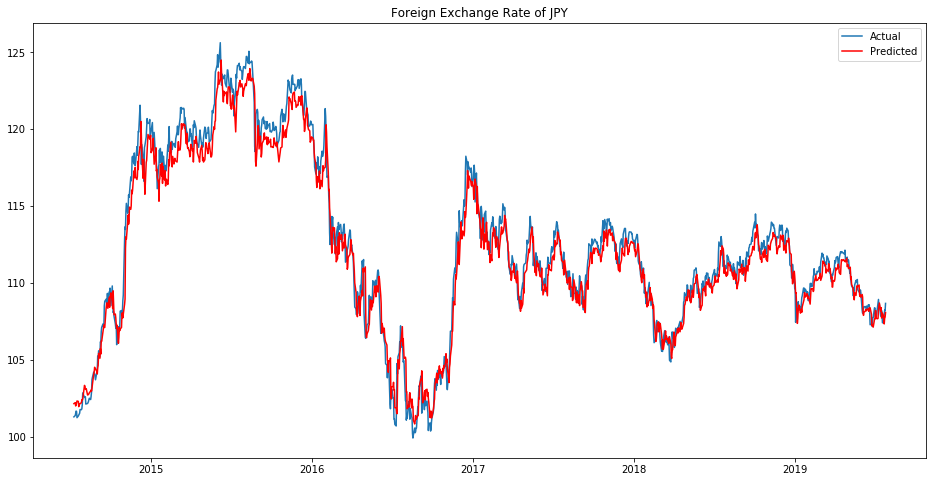

In [54]:
def main_function():
    forex_dataset = pd.read_csv('Data/Historical forex rate/JPY=X.csv')
    forex_dataset.interpolate(inplace = True)
    forex_dataset.drop(['Adj Close','Volume'], axis = 1, inplace = True)
    forex_dataset['Date'] = pd.to_datetime(forex_dataset['Date'], format = '%d/%m/%Y')
    forex_dataset.set_index('Date', inplace= True)
    return experiment(forex_dataset, testing_parameter = [[1],[2]]) # final_model, (X_train, X_test, y_train, y_test, y_pred), 
result = main_function()

In [55]:
result

,mse_result,sign_change_accuracy,y_change_threshold_accurary
testing_parameter,,,
[1],0.805532,0.466565,0.838017
[2],1.116876,0.496195,0.817901


In [ ]:
# # Writing result to an Excel file
# from openpyxl import load_workbook
# filename_result = 'Result/Forex Prediction Result.xlsx'
# wb_result = load_workbook(filename_result)
# ws_result = wb_result.worksheets[0]

# # Title
# ws_result['A1'] = 'Analysis Date'
# ws_result['B1'] = 'Testing period'
# ws_result['C1'] = 'LSTM Architecture' 
# ws_result['D1'] = 'MSE Result'

# for i in range(1,10000):
#     if ws_result['A'+str(i+1)] != '':
#         ws_result['A'+str(i+1)] = today
# wb_result.save(filename_result)

In [ ]:
# from datetime import date

# today = date.today()
# print("Today's date:", today)